In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df=pd.read_csv('CO2_emissions.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [141]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [142]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


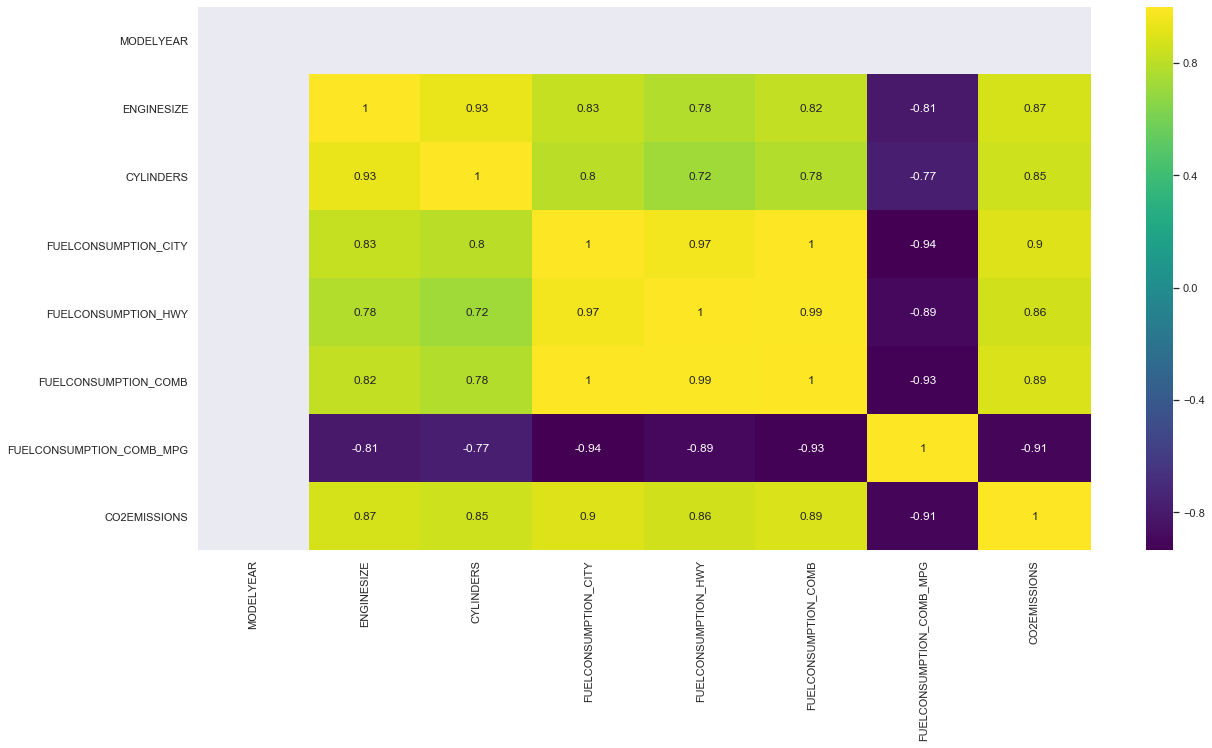

In [143]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
sns.set()

In [144]:
df['FUELCONSUMPTION_COMB_MPG']=df['FUELCONSUMPTION_COMB_MPG'].astype(float)

In [145]:
df.shape

(1067, 13)

In [146]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [147]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [148]:
X=df[['FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']]
y=df['CO2EMISSIONS']

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [151]:
##### improting multiple linear regression
from sklearn.linear_model import LinearRegression

In [152]:
model=LinearRegression()

In [153]:
model.fit(X_train, y_train)

LinearRegression()

In [154]:
y_pred=model.predict(X_test)
y_pred[0:10]

array([316.88421418, 219.84622606, 237.51598899, 219.14390466,
       167.62114755, 290.08456355, 218.70601625, 268.52973209,
       213.3955922 , 311.75590933])

In [155]:
model.coef_

array([-12.44250252, -16.82138665,  34.6831777 ,  -4.8248473 ])

In [156]:
model.intercept_

307.2419744423904

In [157]:
from sklearn.metrics import r2_score

In [158]:
A=r2_score(y_test, y_pred)
A

0.8451832336793249

In [159]:
print('model accuracy score is: ',np.round(A, 2)*100,'%')

model accuracy score is:  85.0 %


In [161]:
from sklearn import externals
import joblib
joblib.dump(model,'CO2_emission.pkl')

['CO2_emission.pkl']